# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

E:\MyPrograms\Anaconda\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: numpy.arange
  


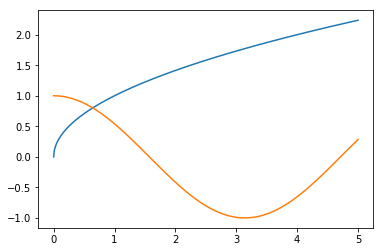

In [145]:
import matplotlib.pyplot as plt
from matplotlib import mlab
import math
import numpy as np

xmin = 0
xmax = 5.0

# Шаг между точками
dx = 0.01

#Создадим список координат по оси 
#X на отрезке [-xmin; xmax], включая концы
xlist = mlab.frange (xmin, xmax, dx)

# Вычислим значение функции в заданных точках
ylist = [math.sqrt(x) for x in xlist]
y1list = [math.cos(x) for x in xlist]

#Нарисуем одномерный график
plt.plot (xlist, ylist)
plt.plot (xlist, y1list)

plt.show()

In [217]:
def fixedpoint(g, x0, a, eps = 0.001):
    xs = np.zeros(20)
    xs[0] = x0
    error = 10
    k = 1
    while (error > eps):
        xs[k] = xs[k - 1] - a*g(xs[k - 1])
        error = abs(xs[k]-xs[k-1])
        k += 1
    return xs[k-1], k

In [218]:
def my_func(x):
    return float(math.sqrt(x) - math.cos(x))

In [219]:
res1, k1 = fixedpoint(my_func, 1, 1, 0.01)

In [220]:
res1, k1

(0.6427727848225863, 5)

In [221]:
def func_pr(x):
    return np.sin(x) + 1/(2 * np.sqrt(x))

In [222]:
def visualize_for_eps(my_func, x0, amin, eps):
    x_amin,n_amin = fixedpoint(my_func, 0.7, amin)

    alpha = np.linspace(0.1, 1.4, 14)
    adim = len(alpha)
    x_a = np.zeros(adim)
    n_a = np.zeros(adim)
    for k in range(adim):
        x_a[k],n_a[k] = fixedpoint(my_func, 0.7, alpha[k], eps)
    f1 = plt.figure(1, figsize=(9,6))
    plt.plot(alpha, n_a, 'b.')
    plt.plot(amin, n_amin, 'rx')
    plt.show()

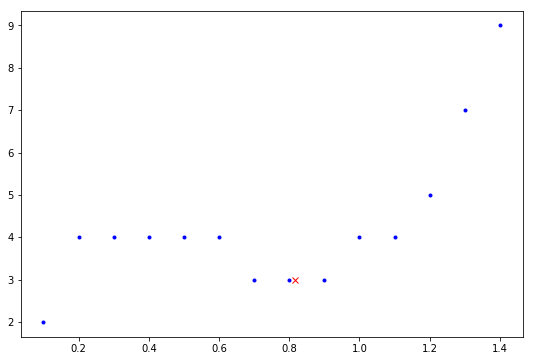

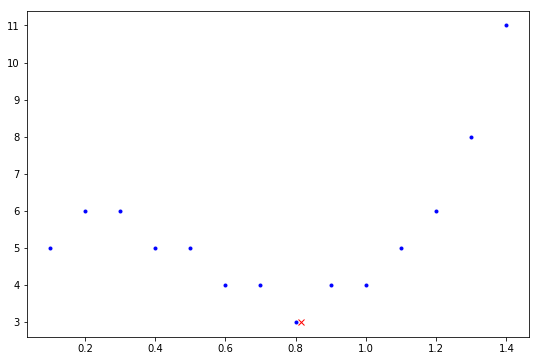

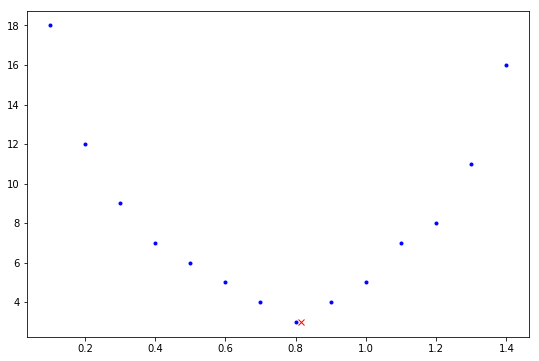

In [223]:
a = 0.6
b = 0.7
n = 10
xd = np.linspace(a, b, n)
fi = func_pr(xd)
m = np.min(fi)
M = np.max(fi)
amin = 2.0/(m+M)
visualize_for_eps(my_func, 1, amin, 0.01)
visualize_for_eps(my_func, 1, amin, 0.005)
visualize_for_eps(my_func, 1, amin, 0.001)

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [228]:
res, k = fixedpoint(my_func, 0.6, 1, 0.001)

In [229]:
res, k

(0.6416141219929243, 5)

# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [315]:
import math
def ctg(x):
    res = x - math.cos(x) / math.sin(x)
    print(res)
    return res

In [316]:
def inv_quad_interpolation(x0, x1, x2, f, eps):
    #x0 = x-2, x1 = x-1, x2 = x
    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)
    
    i = 0
    while (abs(f(x2)) > eps):
        # Lagrange Polinomial at y = 0
        i += 1
        L0 = (x0 * y1 * y2) / ((y0 - y1) * (y0 - y2))
        L1 = (x1 * y0 * y2) / ((y1 - y0) * (y1 - y2))
        L2 = (x2 * y1 * y0) / ((y2 - y0) * (y2 - y1))
        x_new = L0 + L1 + L2
        x0 = x1
        x1 = x2
        x2 = x_new
    return x2, i

In [317]:
x2, i = inv_quad_interpolation(0.6, 0.8, 1, ctg, 0.001)

-0.8616959470781022
-0.17121460065047434
0.35790738406566924
0.35790738406566924
-0.00015158752062149894


In [318]:
x2, i

(0.8602782702895326, 1)

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [218]:
import scipy.optimize
def my_complex_func(x):
    return x**3 - 1

In [219]:
from scipy.misc import derivative
# ... ENTER YOUR CODE HERE ...
def Newton(g, x0, eps):
    xs = np.zeros((20, 3), dtype=np.complex)
    xs[0] = complex(x0)
    error = 10
    k = 1
    x, y = symbols('x y')
    PI = 3.14
    while (error > eps):
        c1 = xs[k - 1, 0] - g(xs[k - 1, 0]) / derivative(g, xs[k - 1, 0])
        r = c1.real ** 2 + c1.imag ** 2
        w = math.atan2(c1.imag, c1.real)
        c2 = complex(r*math.cos(w-2.0*PI/3.0),r*math.sin(w-2.0*PI/3.0))
        c3 = complex(r*math.cos(w+2.0*PI/3.0),r*math.sin(w+2.0*PI/3.0))
        xs[k, 0] = c1
        xs[k, 1] = c2
        xs[k, 2] = c3
        error = abs(xs[k, 0]-xs[k-1, 0])
        k += 1
    return xs[:k], k

In [220]:
res, k = Newton(my_complex_func, 0.6, 0.001)

In [221]:
res

array([[ 0.6       +0.j        ,  0.6       +0.j        ,
         0.6       +0.j        ],
       [ 0.97692308+0.j        , -0.47631151-0.8270224j ,
        -0.47631151+0.8270224j ],
       [ 0.99443357+0.j        , -0.49353948-0.85693541j,
        -0.49353948+0.85693541j],
       [ 0.99862006+0.j        , -0.49770374-0.86416585j,
        -0.49770374+0.86416585j],
       [ 0.99965573+0.j        , -0.49873662-0.86595924j,
        -0.49873662+0.86595924j],
       [ 0.99991398+0.j        , -0.49899434-0.86640672j,
        -0.49899434+0.86640672j]])

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).

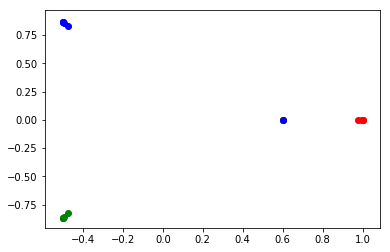

In [222]:
fig, ax = plt.subplots()
ax.scatter(res[:, 0].real, res[:, 0].imag, c = 'r')
ax.scatter(res[:, 1].real, res[:, 1].imag, c = 'g')
ax.scatter(res[:, 2].real, res[:, 2].imag, c = 'b')
plt.show()